In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
gender_encoder = OneHotEncoder(sparse=False)
gender_encoded = gender_encoder.fit_transform(data[["Gender"]])
data = pd.concat([data, pd.DataFrame(gender_encoded, columns=["Male", "Female"])], axis=1)
data.drop("Gender", axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
print(data.columns)

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Male', 'Female'],
      dtype='object')


In [17]:
scaler = StandardScaler()
data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]] = scaler.fit_transform(data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]])

In [20]:
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)", "Male", "Female"]


In [21]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data[features])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [22]:
data["Cluster"] = kmeans.labels_

In [24]:
print("Customer Data with Assigned Clusters:")
print(data[["CustomerID", "Age", "Annual Income (k$)", "Spending Score (1-100)", "Male", "Female", "Cluster"]].to_string(index=False))

Customer Data with Assigned Clusters:
 CustomerID       Age  Annual Income (k$)  Spending Score (1-100)  Male  Female  Cluster
          1 -1.424569           -1.738999               -0.434801   0.0     1.0        2
          2 -1.281035           -1.738999                1.195704   0.0     1.0        2
          3 -1.352802           -1.700830               -1.715913   1.0     0.0        2
          4 -1.137502           -1.700830                1.040418   1.0     0.0        2
          5 -0.563369           -1.662660               -0.395980   1.0     0.0        2
          6 -1.209269           -1.662660                1.001596   1.0     0.0        2
          7 -0.276302           -1.624491               -1.715913   1.0     0.0        2
          8 -1.137502           -1.624491                1.700384   1.0     0.0        2
          9  1.804932           -1.586321               -1.832378   0.0     1.0        0
         10 -0.635135           -1.586321                0.846310   1.0 

In [25]:
print("\nCluster Centroids:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=features))


Cluster Centroids:
        Age  Annual Income (k$)  Spending Score (1-100)      Male    Female
0  0.891681            0.047414               -0.620804  0.549451  0.450549
1 -0.430338            1.022233                1.155936  0.536585  0.463415
2 -0.933811           -0.679798                0.133820  0.588235  0.411765


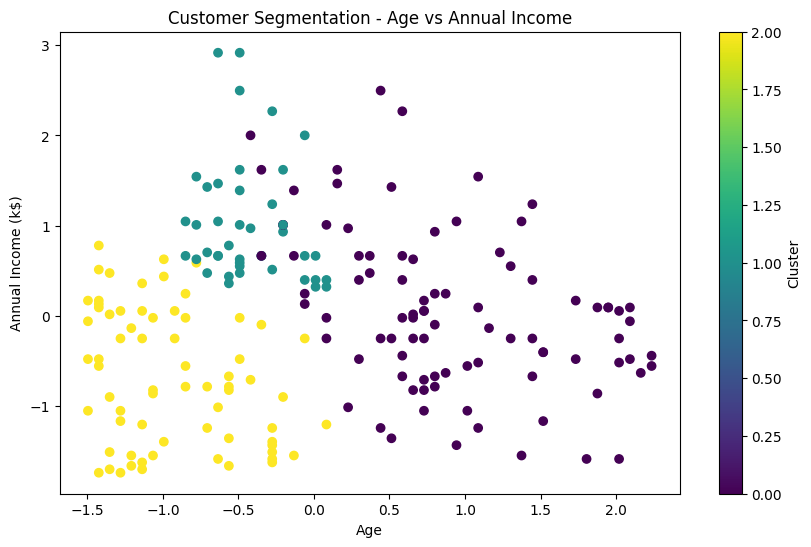

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Annual Income (k$)'], c=data['Cluster'], cmap='viridis')
plt.title('Customer Segmentation - Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.colorbar(label='Cluster')
plt.show()